# Early stopping
---------------------------------

This example shows how we can use early stopping to reduce the time it takes to run the pipeline. This option is only available for models that allow in-training evaluation (XGBoost, LightGBM and CatBoost).

Import the breast cancer dataset from [sklearn.datasets](https://scikit-learn.org/stable/datasets/index.html#wine-dataset). This is a small and easy to train dataset whose goal is to predict whether a patient has breast cancer or not.

## Load the data

In [1]:
# Import packages
from sklearn.datasets import load_breast_cancer
from atom import ATOMClassifier

In [2]:
# Get the dataset's features and targets
X, y = load_breast_cancer(return_X_y=True)

## Run the pipeline

In [3]:
# Start ATOM and fit the models using early stopping
# An early stopping of 0.1 means that the model will stop if it
# didn't improve in the last 10% of it's iterations.
atom = ATOMClassifier(X, y, n_jobs=2, verbose=2, warnings=False, random_state=1)
atom.run('LGB', metric='ap', n_calls=7, n_random_starts=3, bo_params={'early_stopping': 0.1, 'cv': 1})

<< ================== ATOM ================== >>
Algorithm task: binary classification.
Parallel processing with 2 cores.
Applying data cleaning...

Dataset stats ================= >>
Shape: (569, 31)
Scaled: False
----------------------------------
Size of training set: 456
Size of test set: 113
----------------------------------
Class balance: 0:1 <==> 0.6:1.0
Instances in target per class:
|    |    total |    train_set |    test_set |
|---:|---------:|-------------:|------------:|
|  0 |      212 |          167 |          45 |
|  1 |      357 |          289 |          68 |


Running pipeline ============================= >>
Models in pipeline: LGB
Metric: average_precision


Running BO for LightGBM...
Random start 1 ----------------------------------
Parameters --> {'n_estimators': 499, 'learning_rate': 0.73, 'max_depth': 2, 'num_leaves': 40, 'min_child_weight': 5, 'min_child_samples': 18, 'subsample': 0.7, 'colsample_bytree': 0.8, 'reg_alpha': 100, 'reg_lambda': 100}
Early stop at

## Analyze the results

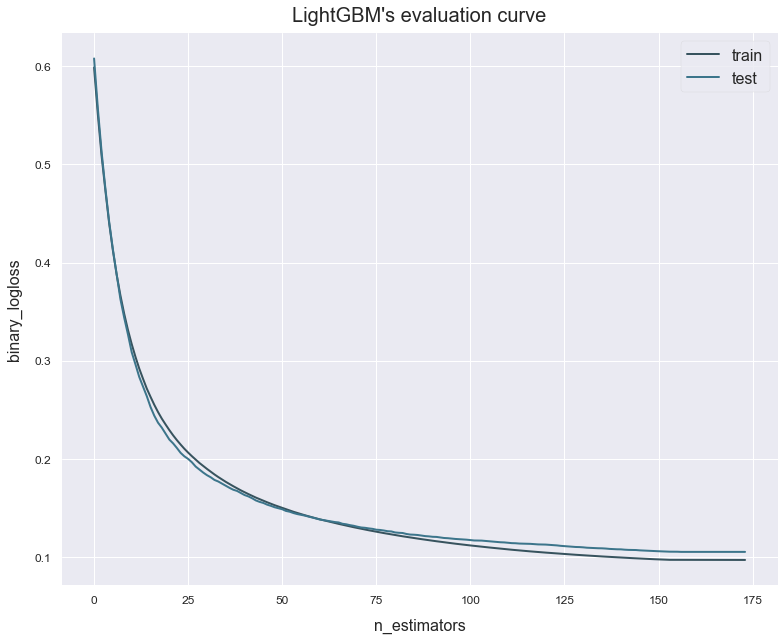

In [4]:
# For these models, we can plot the evaluation on the train and test set during training
# Note that the metric is provided by the model's library, not ATOM!
atom.lgb.plot_evals(title="LightGBM's evaluation curve", figsize=(11, 9))